<a href="https://colab.research.google.com/github/jbpost2/ST-554-Big-Data-With-Python-Course-Notes/blob/main/HW4Key.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 Key

Below is code to do much of what was asked of you in HW 4.

## Summarizing Student Data

For this part, we'll use the StudentData.txt data that comes from the UCI machine learning repository.  Information about the [variables in the dataset can be found here](https://archive.ics.uci.edu/ml/datasets/Student+Performance).  I want you to look at the math scores data set.

### Read in the data

- You can either read this dataset from the URL or download it and read it in locally. Check out the first few observations of the data.

In [1]:
#Read the student math dataset in locally
import pandas as pd
math=pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt", sep=";")

#check the data using head()
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Summarize the data

This data has many categorical variables and a few numeric.  You should do the following:

**Categorical variables**

- Convert some of the categorical variables into `category` type variables
- Create a one-way contingency table, a two-way contingency table, and a three-way contingency table
    + Interpret a number from each resulting table (that is, pick out a value produced and explain what that value means.)
- Create a conditional two-way table.  That is, condition on one variable's setting and create a two-way table. Do this using two different methods:
    + Once, by subsetting the data (say with `.loc`) and then creating the two-way table
    + Once, by creating a three-way table and subsetting it
- Create a stacked bar graph and a side-by-side bar graph.  Give relevant `x` and `y` labels, and a title for the plots.

First we'll look at how the data is stored.

In [2]:
#review the dtype of each variable
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Now we want to convert some of the variables to category type variables.  We can do that quickly using the `.apply()` method and a `lambda` function.

In [3]:
#Convert three categorical variables into cateogry type variables
math[["school","sex","address"]] = math[["school","sex","address"]].apply(lambda x: x.astype("category"))

#check the variable types after conversion
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    object  
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    object  
 9   Fjob        395 non-null    object  
 10  reason      395 non-null    object  
 11  guardian    395 non-null    object  
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    object  
 16  famsup      395 non-null    object  
 17  paid        395 non-null    object  
 18  activities  395 non-null    object  
 19  nursery 

Let's create a one-way table of the school variable to see how many students come from each school.

In [4]:
#Create a one-way contingency table using school。
math.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

Interpretation: This one-way contingency table shows that there are 349 students from Gabriel Pereira (GP) schools in the dataset.

Next, let's do a two-way table between school and sex to understand the breakdown of those two variables.  We'll also return the marginal totals as well.

In [5]:
#Create a two-way contingency table, with marginal total.
pd.crosstab(math.school, math.sex, margins=True)

sex,F,M,All
school,,,
GP,183,166,349
MS,25,21,46
All,208,187,395


Interpretation: There were 183 female students from Gabriel Pereira (GP) schools in this data set.  

Let's extend this to a three-way table.  This will allow us to understand how the school, sex, and location type (address) of the students is distributed.

In [6]:
#Create a three-way contingency table
pd.crosstab([math.school, math.sex], math.address, margins=True)

address      R    U  All
school sex              
GP     F    31  152  183
       M    32  134  166
MS     F    13   12   25
       M    12    9   21
All         88  307  395

Iterpretation: The 31 in the three-way contingency table shows that there are 31 female students who have a rural area address are from Gabriel Pereira(GP) schools in this data set.

Now we'll condition on a variable and create a two-way table.  Here we'll subset the data to only show students from the "GP" school and then do a two-way table between sex and address.

In [7]:
#Create a conditional two-way table (eg., sex by address) by subsetting the data
#Subset the data
math_gp = math[math["school"] == "GP"]

#creat the table using the subsetted data
pd.crosstab(math_gp.sex, math_gp.address)

address,R,U
sex,,
F,31,152
M,32,134


We can create this same table by subsetting the three table appropriately.

In [8]:
# Create a conditional two-way table (eg. sex by address) by creating a three-way table and subsetting it (e.g., keep only the GP school students)
#creat the 3-way table
mytab = pd.crosstab([math.school, math.sex], math.address)

#create the table by subsetting the 3-way table
mytab.loc["GP",:]

address,R,U
sex,,
F,31,152
M,32,134


As shown above, we got the same sex by addressy 2X2 contingency table using the two methods.

Now let's create some visuals of these contingency tables.  In particular we'll start with a stacked bar plot between the School and Sex variables.

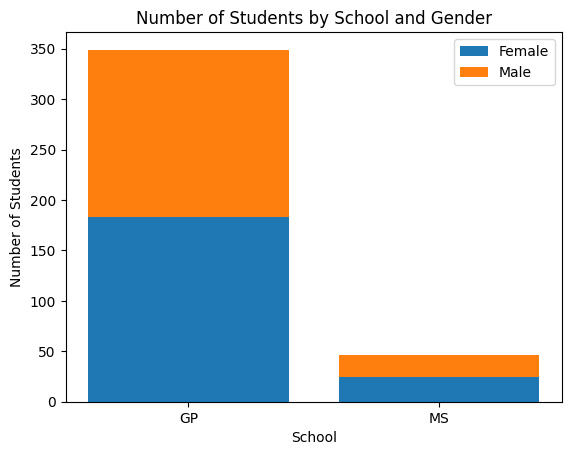

In [9]:
#Create a stacked bar graph, showing the labels, and a title
import matplotlib.pyplot as plt

#create the contingency table and assign it to object `stack`
stack = pd.crosstab(math.school, math.sex)

#create the plot with matpltlib
p1 = plt.bar(
    x = math.school.cat.categories,
    height = stack.loc[:, "F"]
    )
p2 = plt.bar(
    x = math.school.cat.categories,
    height = stack.loc[:, "M"],
    bottom = stack.loc[:, "F"]
    )

plt.xlabel("School")
plt.ylabel("Number of Students")
plt.title("Number of Students by School and Gender")
plt.legend((p1[0],p2[0]),("Female", "Male"), loc = 0)


We can see that this gives the same info as the two-way contingency table, but it is more visually appealing.  That being said, it is a bit tough to compare the proportions of male/female for the two schools in the form.  Instead we can do side-by-side bar plots.

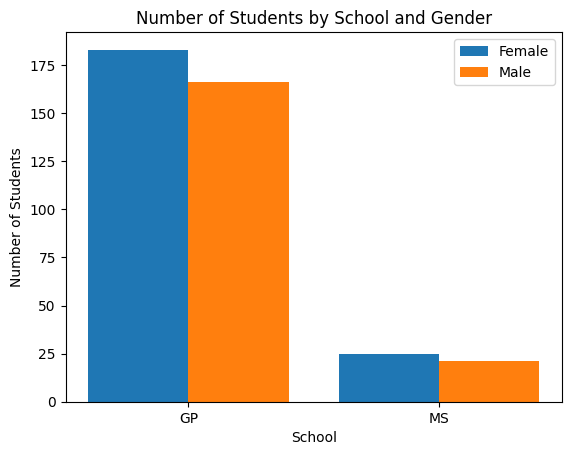

In [10]:
#Create a side-by-side bar graph, showing the labels and a title
labels = math.school.cat.categories
length = len(labels)
width = 0.4
p1 = plt.bar(
    x = [i - width/2 for i in range(0,length)],
    height = stack.loc[:, "F"],
    width = width
    )
p2 = plt.bar(
    x = [i + width/2 for i in range(0,length)],
    height = stack.loc[:, "M"],
    width = width
    )
plt.xticks(range(0,length), labels)
plt.xlabel("School")
plt.ylabel("Number of Students")
plt.title("Number of Students by School and Gender")
plt.legend((p1[0],p2[0]),("Female", "Male"), loc = 0)

Ok, now we can see that same information but it is a bit clearer.  The differences in sex distribution across the two schools is pretty minimal.

#### Numeric variables (and across groups)

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).  

- Find measures of center and spread for three of these variables (including G3 as one of them)
    + Repeat while subsetting the data (say with `.loc`)
- Find measures of center and spread across a single grouping variable for three of these variables (including G3 as one of them)
- Find measures of center and spread across two grouping variables for three of these variables (including G3 as one of them)
- Create a correlation matrix between all of the numeric variables
- Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the categorical variables (that is, create graphs that can compare the distributions across the groups).  For at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the same plot.   Add appropriate labels and titles.
- Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis).  Color the points by a categorical variable in each.  Add appropriate labels and titles.


First we'll find measures of center and spread for the age, absences, and G3 variables.  Namely, we'll look at the mean and median for center and sd for spread.

In [11]:
#Find measures of center (mean, median) and spread for three variables (age, absences, G3)
#For readability, I rounded the numbers to 2 decimals.
print(math[["age", "absences", "G3"]].mean())
print(math[["age", "absences", "G3"]].median())
#Or find a bunch of things at once (50% percentile = median)
math[["age", "absences", "G3"]].describe().round(decimals = 2)

age         16.696203
absences     5.708861
G3          10.415190
dtype: float64
age         17.0
absences     4.0
G3          11.0
dtype: float64


,age,absences,G3
count,395.00,395.00,395.00
mean,16.70,5.71,10.42
std,1.28,8.00,4.58
min,15.00,0.00,0.00
25%,16.00,0.00,8.00
50%,17.00,4.00,11.00
75%,18.00,8.00,14.00
max,22.00,75.00,20.00


Great!  We can see things like:
- The average age of students is 16.7 and the median is 17.  Likely a pretty symmetric distribution of age.  The standard deviation is pretty small so most students are around the same ages.
- The average number of absences is 5.71 but the median is 4.  This implies a right skewed distribution (probably, best addressed via a histogram).  Perhaps a small number of students account for a large number of absences.  The standard deviation of absences is pretty large!
- For the final grade, the mean and median are pretty close to one another and the spread is reasonably big compared to the maximum of 20.

Now we'll repeat the above but subset the data to only look at Rural students.

In [12]:
#Or find a bunch of things at once (50% percentile = median)
math[["age", "absences", "G3"]].loc[math.address == "R"].describe().round(decimals = 2)

,age,absences,G3
count,88.00,88.00,88.00
mean,17.05,6.12,9.51
std,1.28,9.57,4.56
min,15.00,0.00,0.00
25%,16.00,1.00,7.00
50%,17.00,4.00,10.00
75%,18.00,8.00,12.00
max,21.00,75.00,19.00


We see there are slightly more absences on average for the rural students but the median is still the same.  The final grades also appear to be lower on average.

Next, we look at measures of center and spread across a grouping variable - here sex.

In [13]:
#Find measures of center and spread across a single grouping variable (e.g.,sex) for three of these variables (age, absences, G3)
#For readability, I rounded the numbers to 2 decimals.
#50% percentile = median
math.groupby("sex")[["age", "absences", "G3"]].describe().round(decimals = 2)

age                                            absences        ...  \
     count   mean   std   min   25%   50%   75%   max    count  mean  ...   
sex                                                                   ...   
F    208.0  16.73  1.20  15.0  16.0  17.0  18.0  20.0    208.0  6.22  ...   
M    187.0  16.66  1.36  15.0  16.0  16.0  18.0  22.0    187.0  5.14  ...   

                   G3                                           
     75%   max  count   mean   std  min  25%   50%   75%   max  
sex                                                             
F    8.0  75.0  208.0   9.97  4.62  0.0  8.0  10.0  13.0  19.0  
M    8.0  38.0  187.0  10.91  4.50  0.0  9.0  11.0  14.0  20.0  

[2 rows x 24 columns]

The means and medians are pretty close for age but differ quite a bit for absences and final grade.  That might be something to dig further into.  Is there a reason females would miss more classes?  Perhaps that is part of the on average lower final grades.

Let's break it down even further by looking at the measures across sex and rural/urban.

In [14]:
#Find measures of center and spread across two grouping variables (e.g., sex, address) for three of these variables (age, absences, G3)
pd.set_option('display.max_columns', None)
math.groupby(["sex", "address"])[["age", "absences", "G3"]].describe().round(decimals = 2)

age                                             absences        \
             count   mean   std   min   25%   50%    75%   max    count  mean   
sex address                                                                     
F   R         44.0  16.98  1.23  15.0  16.0  17.0  18.00  19.0     44.0  7.45   
    U        164.0  16.66  1.19  15.0  16.0  17.0  17.25  20.0    164.0  5.88   
M   R         44.0  17.11  1.33  15.0  16.0  17.0  18.00  21.0     44.0  4.80   
    U        143.0  16.52  1.34  15.0  15.0  16.0  17.00  22.0    143.0  5.25   

                                                  G3                          \
               std  min   25%  50%  75%   max  count   mean   std  min   25%   
sex address                                                                    
F   R        12.70  0.0  1.75  4.0  8.0  75.0   44.0   9.27  4.45  0.0  7.00   
    U         8.38  0.0  0.00  4.0  8.0  56.0  164.0  10.15  4.66  0.0  8.00   
M   R         4.52  0.0  0.75  4.0  8.0  20.0   44.0   9.75  4.70  0.0  7.75   
    U         6.37  0.0  0.00  3.0  8.0  38.0  143.0  11.27  4.38  0.0  9.00   

                               
              50%   75%   max  
sex address                    
F   R        10.0  11.0  19.0  
    U        11.0  14.0  19.0  
M   R        10.0  13.0  18.0  
    U        11.0  14.0  20.0

We can see little differences for the average age for females across the R/U divide but some difference for males.  When it comes to absences there seems to be a big and differing trend by sex for the R/U students.  The average for F, R is 7.45 but for F, U it is 5.88.  This trend flips for males!  Interesting.  The spreads are also much higher for the female group.

When we look at final grade, it certainly appears that the urban students are doing better for both males and females on average.  

Let's investigate a correlation matrix between all of the numeric variables.  This will give us a good idea as to whether the variables are linearly related.

In [15]:
#Create a correlation matrix between all of the five numeric variables
math[["age","absences","G1","G2","G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


As expected, the different grade variables show a lot of agreement. If you did well early, you likely did well later too.  We see that absences doesn't have much of a linear relationship with the grade variables but age seems to have a weak relationship that perhaps is growing as the course moves on.

Now we'll visualize some of the variables.  Let's tart with the G3 variable broken down but R/U status.

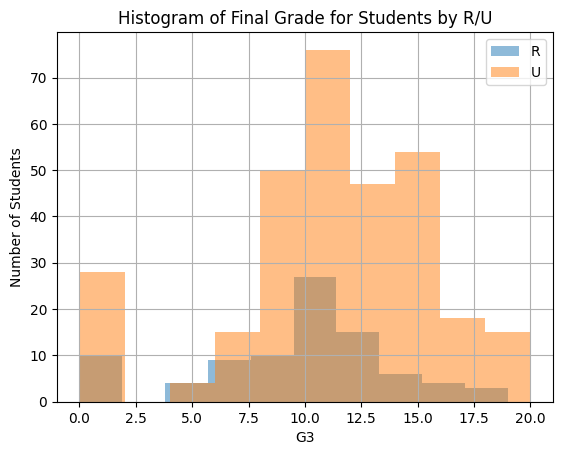

In [16]:
#Histogram 1: Create a histogram for G3 across address
math.groupby("address")["G3"].hist(alpha=0.5)
plt.xlabel("G3")
plt.ylabel("Number of Students")
plt.title("Histogram of Final Grade for Students by R/U")
plt.legend(math.address.cat.categories)

We see somewhat similarly shaped distributions.  Next, let's look at sex by final grade.

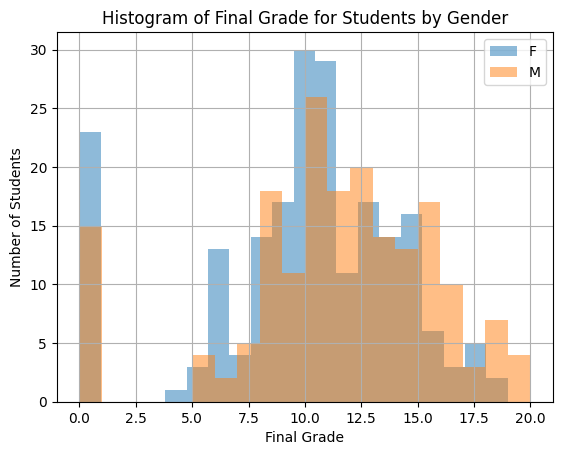

In [17]:
#Histogram 2: Create a histogram for G3 across gender(sex)
math.groupby("sex")["G3"].hist(bins=20, alpha=0.5)
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.title("Histogram of Final Grade for Students by Gender")
plt.legend(math.sex.cat.categories)


Again we see mostly similar distributions.  Instead of the variable histogram, let's do a density plots instead.

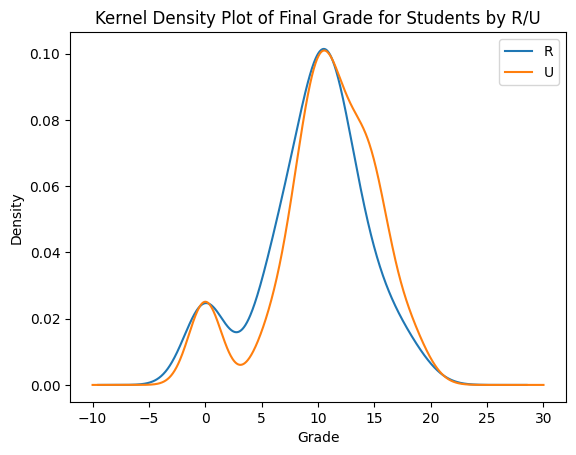

In [18]:
#Kernel Density Plot 1: for G3 across address
math.groupby("address")["G3"].plot.density()
plt.xlabel("Grade")
plt.title("Kernel Density Plot of Final Grade for Students by R/U")
plt.legend(math.address.cat.categories)

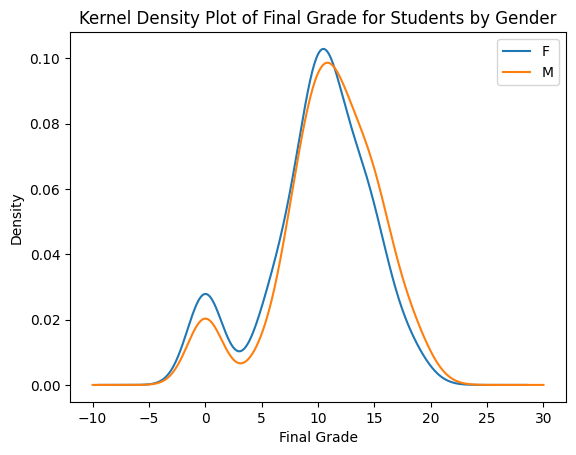

In [19]:
#Kernel Density Plot 2: for G3 across gender(sex)
math.groupby("sex")["G3"].plot.density()
plt.xlabel("Final Grade")
plt.title("Kernel Density Plot of Final Grade for Students by Gender")
plt.legend(math.sex.cat.categories)

Both of these plots show the similarities and differences a bit more clearly!

Now, a boxplot to display the layout of the distributions.

Text(0, 0.5, 'G3')

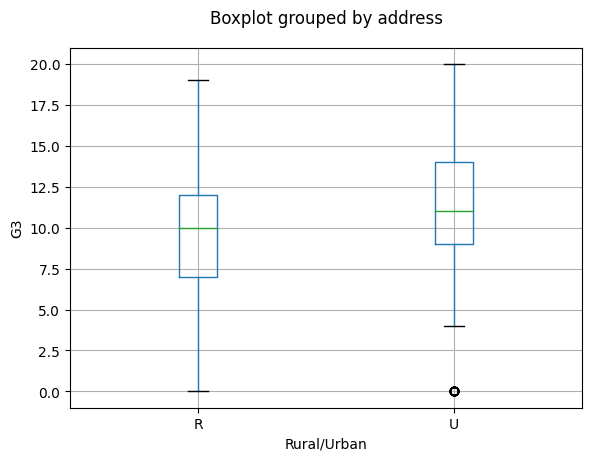

In [20]:
#Boxplot 1: for G3 across address
math.boxplot(column = "G3", by = "address").set_title("")
plt.xlabel("Rural/Urban")
plt.ylabel("G3")

Ok, we can see the differences in the quartiles pretty clearly there.  Now the G3 and sex variables.

Text(0, 0.5, 'Final Grade')

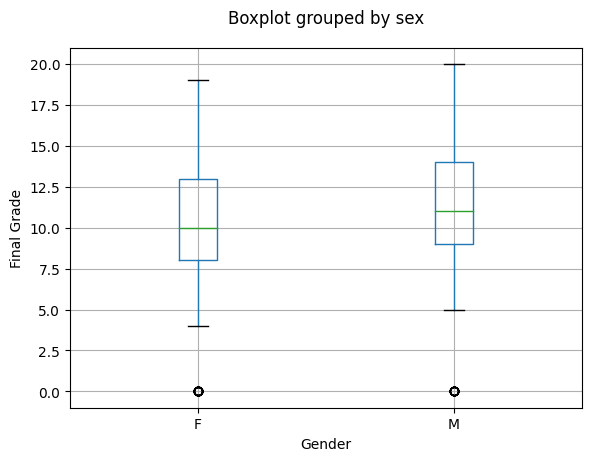

In [21]:
#Boxplot 2: for G3 across gender(sex)
math.boxplot(column = "G3", by = "sex").set_title("")
plt.xlabel("Gender")
plt.ylabel("Final Grade")

We see similar patterns here.

How about some scatter plots to look at the linear (or nonlinear) relationships?

Text(0, 0.5, 'Final Grade')

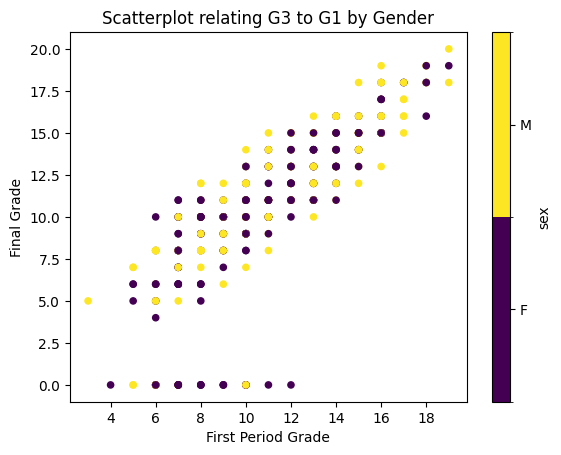

In [22]:
#Scatterplot 1: Create scatterplot relating G3 to G1 by gender
fig, ax=plt.subplots()
math.plot.scatter(
    x = "G1",
    y = "G3",
    c = "sex",
    cmap = "viridis",
    ax=ax).set_title("Scatterplot relating G3 to G1 by Gender")
ax.set_xlabel("First Period Grade")
plt.ylabel("Final Grade")

Ok, we see that, if we remove the people that got a 0 for their first grade, there is a pretty strong linear relationship for both sex groups.

Text(0, 0.5, 'Final Grade')

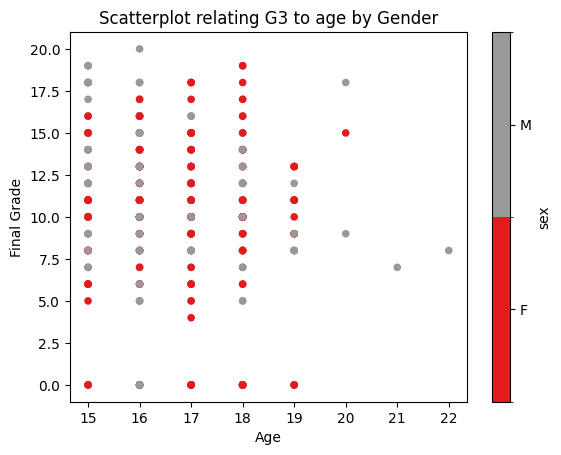

In [23]:
#Scatterplot 2: Create scatterplot relating G3 to age by gender
fig, ax=plt.subplots()
math.plot.scatter(
    x = "age",
    y = "G3",
    c = "sex",
    cmap = "Set1",
    ax=ax).set_title("Scatterplot relating G3 to age by Gender")
ax.set_xlabel("Age")
plt.ylabel("Final Grade")

As we instead look at age, we see less of a linear relationship.  It would help to 'jitter' the points a bit as many sit on top of one-another.  No easy functionality to do so.  We can create a similar plot via seaborn though!

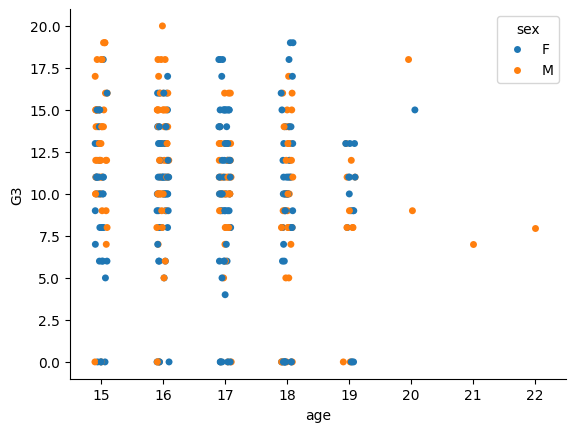

In [24]:
import seaborn as sns
sns.stripplot(x='age', y='G3', data=math, hue = "sex")
sns.despine()

## NFL Data

### Read in the data and check it out

In [25]:
import pandas as pd
nfl_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")

In [26]:
nfl_data.info

<bound method DataFrame.info of            week    date  day  season             awayTeam  AQ1  AQ2  AQ3  AQ4  \
0             1   5-Sep  Thu    2002  San Francisco 49ers    3    0    7    6   
1             1   8-Sep  Sun    2002    Minnesota Vikings    3   17    0    3   
2             1   8-Sep  Sun    2002   New Orleans Saints    6    7    7    0   
3             1   8-Sep  Sun    2002        New York Jets    0   17    3   11   
4             1   8-Sep  Sun    2002    Arizona Cardinals   10    3    3    7   
...         ...     ...  ...     ...                  ...  ...  ...  ...  ...   
3466   Division  11-Jan  Sun    2014   Indianapolis Colts    0   14    7    3   
3467   Division  11-Jan  Sun    2014       Dallas Cowboys    7    7    7    0   
3468  ConfChamp  18-Jan  Sun    2014    Green Bay Packers   13    3    0    6   
3469  ConfChamp  18-Jan  Sun    2014   Indianapolis Colts    0    7    0    0   
3470  SuperBowl   1-Feb  Sun    2014     Seattle Seahawks    0   14   10    0

Create some category variables.

In [28]:
nfl_data["homeTeam"] = nfl_data.homeTeam.astype("category")
nfl_data["awayTeam"] = nfl_data.awayTeam.astype("category")
nfl_data["day"] = nfl_data.day.astype("category")
nfl_data["stadium"] = nfl_data.stadium.astype("category")
nfl_data["startTime"] = nfl_data.startTime.astype("category")
nfl_data["toss"] = nfl_data.toss.astype("category")
nfl_data["roof"] = nfl_data.roof.astype("category")
nfl_data["surface"] = nfl_data.surface.astype("category")
nfl_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,AOT2,AFinal,homeTeam,HQ1,HQ2,HQ3,HQ4,HOT,HOT2,HFinal,stadium,startTime,toss,roof,surface,duration,attendance,weather,vegasLine,OU,AfirstDowns,AnetPassYds,AtotalYds,Aturnovers,AtotalPlays,HfirstDowns,HnetPassYds,HtotalYds,Hturnovers,HtotalPlays,OUvalue,OUresult,awayRushAtt,awayRushYds,awayRushTD,awayPassComp,awayPassAtt,awayPassYds,awayPassTD,awayPassInt,awayTimesSacked,awaySackYdsLost,awayFum,awayFumLost,awayNumPen,awayPenYds,away3rdConv,away3rdAtt,away4thConv,away4thAtt,awayTOP,homeRushAtt,homeRushYds,homeRushTD,homePassComp,homePassAtt,homePassYds,homePassTD,homePassInt,homeTimesSacked,homeSackYdsLost,homeFum,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,-1,16,New York Giants,3,3,0,7,-1,-1,13,Giants Stadium,8:38pm,Giants,outdoors,grass,170,"78,748","73 degrees relative humidity 49%, wind 7 mph",San Francisco 49ers -4.0,39.0 (under),13,166,279,1,51,21,318,361,3,70,39.0,(under),25,113,0,16,26,166,1,1,0,0,0,0,5,29,2,6,0,0,27.53,22,43,1,28,45,342,0,3,3,24,0,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,-1,23,Chicago Bears,7,3,3,14,-1,-1,27,Memorial Stadium (Champaign),1:04pm,Vikings,outdoors,astroplay,201,"63,226","85 degrees relative humidity 0%, wind 3 mph",Chicago Bears -4.5,41.0 (over),19,228,368,3,62,20,288,368,2,60,41.0,(over),33,140,1,16,28,234,1,2,1,6,2,1,8,52,3,8,0,0,31.52,26,80,1,20,33,297,2,1,1,9,1,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,-1,26,Tampa Bay Buccaneers,0,3,7,10,0,-1,20,Raymond James Stadium,4:15pm,Buccaneers,outdoors,grass,221,"65,554","90 degrees relative humidity 57%, wind 6 mph",Tampa Bay Buccaneers -6.0,37.5 (over),21,250,368,1,78,19,261,333,1,77,37.5,(over),34,118,0,24,42,260,2,1,2,10,0,0,5,45,6,11,0,0,40.68,21,72,0,28,53,278,2,1,3,17,1,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,-1,37,Buffalo Bills,3,14,7,7,0,-1,31,Ralph Wilson Stadium,1:04pm,Bills,outdoors,astroturf,205,"72,751","86 degrees relative humidity 75%, wind 6 mph",New York Jets -3.0,43.0 (over),18,193,266,1,47,26,242,384,3,75,43.0,(over),14,73,0,24,30,210,2,0,3,17,1,1,10,90,2,4,0,0,21.10,32,142,3,26,39,271,1,2,4,29,1,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,-1,23,Washington Redskins,3,7,14,7,-1,-1,31,FedExField,1:05pm,Redskins,outdoors,grass,184,"85,140","76 degrees relative humidity 71%, wind 5 mph",Washington Redskins -6.0,44.5 (over),14,187,257,1,57,21,320,442,1,73,44.5,(over),20,70,1,14,36,187,1,1,1,0,1,0,1,5,3,7,0,0,25.60,32,122,1,28,40,327,3,1,1,7,0,0,7,56,6,10,1,2,34.40,8,6.0


Create some summary data to plot!

        AverageAFinal  AverageHFinal
season                              
2002        20.640449      23.018727
2003        19.112360      22.677903
2004        20.239700      22.906367
2005        18.786517      22.314607
2006        20.254682      21.258427


<Axes: xlabel='season'>

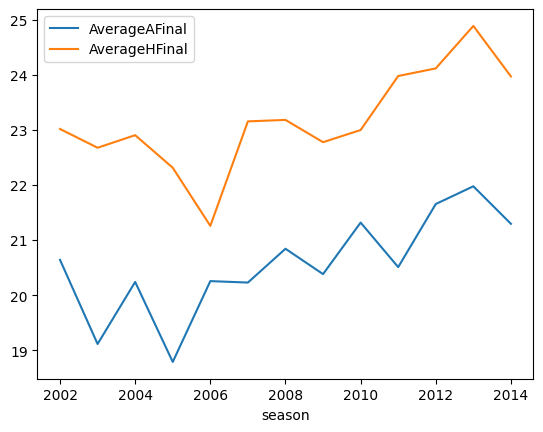

In [29]:
summary_data = nfl_data \
  .groupby("season") \
  .agg(
      AverageAFinal = ("AFinal", "mean"),
      AverageHFinal = ("HFinal", "mean"),
)
print(summary_data.head())
summary_data.plot()

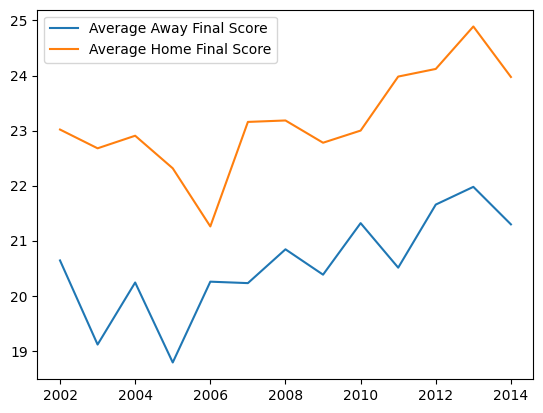

In [30]:
plt.plot(summary_data.index, summary_data["AverageAFinal"], label = "Average Away Final Score")
plt.plot(summary_data.index, summary_data["AverageHFinal"], label = "Average Home Final Score")
plt.legend()

Now by season and day.

In [31]:
summary_data = nfl_data[["season", "day", "AFinal", "HFinal"]] \
  .groupby(["season", "day"]) \
  .mean()

In [32]:
summary_data.head()

AFinal     HFinal
season day                      
2002   Fri        NaN        NaN
       Mon  19.647059  21.823529
       Sat  14.666667  19.222222
       Sun  20.962185  23.319328
       Thu  18.666667  17.333333

Create a fun line plot showing different days.

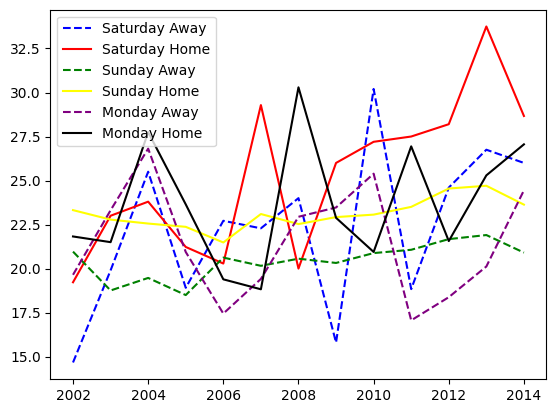

In [46]:
Saturday = summary_data.loc[((season, "Sat") for season in range(2002, 2015))]
plt.plot(range(2002, 2015), Saturday["AFinal"], label = "Saturday Away", color = "blue", linestyle = "dashed")
plt.plot(range(2002, 2015), Saturday["HFinal"], label = "Saturday Home", color = "red")
Sunday = summary_data.loc[((season, "Sun") for season in range(2002, 2015))]
plt.plot(range(2002, 2015), Sunday["AFinal"], label = "Sunday Away", color = "green", linestyle = "dashed")
plt.plot(range(2002, 2015), Sunday["HFinal"], label = "Sunday Home ", color = "yellow")
Monday = summary_data.loc[((season, "Mon") for season in range(2002, 2015))]
plt.plot(range(2002, 2015), Monday["AFinal"], label = "Monday Away", color = "purple", linestyle = "dashed")
plt.plot(range(2002, 2015), Monday["HFinal"], label = "Monday Home", color = "black")
plt.legend()

Now define a function to do some plotting.

In [43]:
def plot_day(summary_data, day_to_plot = "Sun"):
  day = summary_data.loc[((season, day_to_plot) for season in range(2002, 2015))]
  plt.plot(range(2002, 2015), day["AFinal"], label = "Saturday Away: " + day_to_plot, color = "blue", linestyle = "dashed")
  plt.plot(range(2002, 2015), day["HFinal"], label = "Saturday Home: " + day_to_plot, color = "red")
  plt.legend()

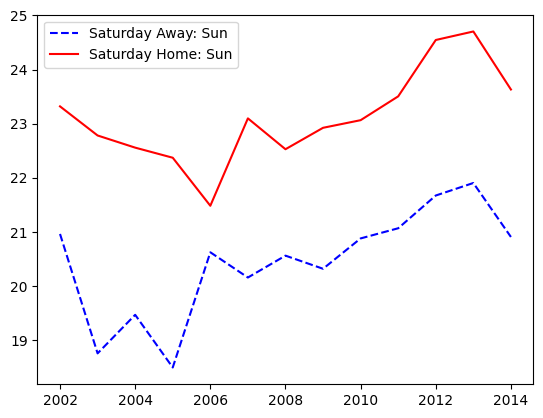

In [44]:
plot_day(summary_data)

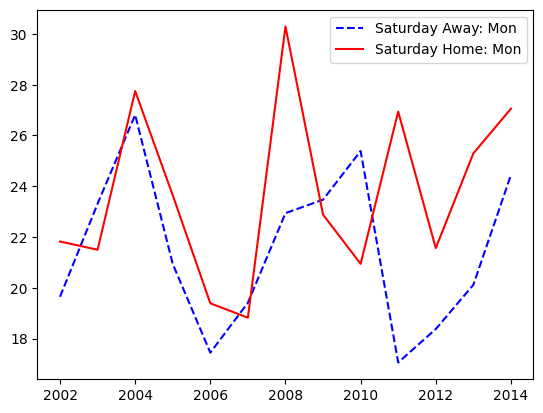

In [45]:
plot_day(summary_data, day_to_plot = "Mon")